# Intro to Tensorflow and Keras for CSS Scholars

**Date created:** 2020/10/08<br>
**Last modified:** 2020/10/12<br>
**Description:** Everything you need to know to use Keras & TensorFlow for deep learning research.<br>
**Disclosure:** This tutorial is based on <https://keras.io/getting_started/intro_to_keras_for_researchers/>

## What is TensorFlow?

<img src="https://www.gstatic.com/devrel-devsite/prod/v36e9b4a2fdc696650f09851e8c880b958655492821ded3455f80aaef87b6b52b/tensorflow/images/lockup.svg?dcb_=0.5217759589426851" width="500"></img>

https://tensorflow.org


TensorFlow is a free and open-source software library for dataflow and differentiable programming. It is a symbolic math library used for machine learning applications such as neural networks.

TensorFlow was developed by the Google Brain team for internal Google use. Open Sourced November 2015.

TensorFlow handles tensor, tf variables, and gradients.

## What is Keras?

<img src="https://keras.io/img/logo.png" width="500"></img> </br>

https://keras.io/


Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. So Keras is a high level API that deals with models, layers, optimization, etc. It contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools for processsing image and text data.

If you go to this page, you can see all Keras API references <https://keras.io/api/>:

**Models API** (Sequential class, Model training APIs, Model saving & serialization APIs)

**Layers API** (base layers, core layers, covlayers, pooling layers, activation, locally connected layers etc.)

**Callbacks API** (base Callback class, ModelCheckpoint, TensorBoard, EarlyStopping, etc)

**Data preprocessing** (Image data preprocessing, Text data preprocessing)

**Optimizers** (SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, etc)

**Metrics** (Accuracy metrics, Probabilistic metrics, Regression metrics, Classification metrics based on True/False)

**Losses** (Probabilistic losses, Regression losses, Hinge losses for "maximum-margin" classification)

**Built-in small datasets** (MNIST digits classification dataset, CIFAR10 small images classification dataset, CIFAR100, small images classification dataset, IMDB movie review sentiment classification dataset, Reuters newswire classification dataset, Fashion MNIST dataset, an alternative to MNIST, Boston Housing price regression dataset)

**Keras Applications** (Xceptionm EfficientNet B0 to B7, VGG16 and VGG19, ResNet and ResNetV2, MobileNet and MobileNetV2, DenseNet, NasNetLarge and NasNetMobile, InceptionV3, InceptionResNetV2)

## Let us get it started!!!

**Installation**

`pip install "tensorflow>=2.0.0"`

Will get you setup for CPU-only, vanilla TensorFlow, including the Tensorflow version of Keras

TensorFlow has very wide spectrum of possible optimization

GPU, Cluster, optimized execution ordering, vector processing instructions, ....

Compile yourself to get higher efficiency

Also make sure you have the PyLab stack

`pip install scipy numpy matplotlib`

Additional recommended Python tools to make this comfortable are iPython and Jupyter Lab

`pip install ipython jupyter`

In [3]:
import tensorflow as tf
from tensorflow import keras

## Introduction

In this guide, you will learn about:

- Tensors, variables, and gradients in TensorFlow
- The Keras Sequential API
- The Keras Functional API

You will also see the Keras API in action in two end-to-end research examples:
Train a simple neural network and use pretrained models to do transfer learning.

## Tensors

TensorFlow is an infrastructure layer for differentiable programming.
At its heart, it's a framework for manipulating N-dimensional arrays (tensors),
much like NumPy.

However, there are three key differences between NumPy and TensorFlow:

- TensorFlow can leverage hardware accelerators such as GPUs and TPUs.
- TensorFlow can automatically compute the gradient of arbitrary differentiable tensor expressions.
- TensorFlow computation can be distributed to large numbers of devices on a single machine, and large number of
machines (potentially with multiple devices each).

Let's take a look at the object that is at the core of TensorFlow: the Tensor.

Here's a constant tensor:

In [4]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


You can get its value as a NumPy array by calling `.numpy()`:

In [5]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

Much like a NumPy array, it features the attributes `dtype` and `shape`:

In [6]:
print("dtype:", x.dtype)
print("shape:", x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


A common way to create constant tensors is via `tf.ones` and `tf.zeros` (just like `np.ones` and `np.zeros`):

In [7]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


You can also create random constant tensors:

In [8]:
x = tf.random.normal(shape=(2, 2), mean=0.0, stddev=1.0)

x = tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype="int32")


## Variables

Variables are special tensors used to store mutable state (such as the weights of a neural network).
You create a `Variable` using some initial value:

In [9]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.37182763,  0.22012323],
       [-0.55250424,  1.0443032 ]], dtype=float32)>


You update the value of a `Variable` by using the methods `.assign(value)`, `.assign_add(increment)`, or `.assign_sub(decrement)`:

In [10]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
    for j in range(2):
        assert a[i, j] == new_value[i, j]

added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
for i in range(2):
    for j in range(2):
        assert a[i, j] == new_value[i, j] + added_value[i, j]

## Doing math in TensorFlow

If you've used NumPy, doing math in TensorFlow will look very familiar.
The main difference is that your TensorFlow code can run on GPU and TPU.

In [11]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

## Gradients

Here's another big difference with NumPy: you can automatically retrieve the gradient of any differentiable expression.

Just open a `GradientTape`, start "watching" a tensor via `tape.watch()`,
and compose a differentiable expression using this tensor as input:

In [12]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
    tape.watch(a)  # Start recording the history of operations applied to `a`
    c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
    
# What's the gradient of `c` with respect to `a`?
dc_da = tape.gradient(c, a)
print(dc_da)


tf.Tensor(
[[-0.82511973 -0.8401327 ]
 [-0.39537013  0.46082982]], shape=(2, 2), dtype=float32)


By default, variables are watched automatically, so you don't need to manually `watch` them:

In [13]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
    print(dc_da)

tf.Tensor(
[[-0.82511973 -0.8401327 ]
 [-0.39537013  0.46082982]], shape=(2, 2), dtype=float32)


Note that you can compute higher-order derivatives by nesting tapes:

In [14]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
        c = tf.sqrt(tf.square(a) + tf.square(b))
        dc_da = tape.gradient(c, a)
    d2c_da2 = outer_tape.gradient(dc_da, a)
    print(d2c_da2)


tf.Tensor(
[[0.7954273  0.23032266]
 [0.9329477  2.6380043 ]], shape=(2, 2), dtype=float32)


## Keras layers

While TensorFlow is an **infrastructure layer for differentiable programming**,
dealing with tensors, variables, and gradients,
Keras is a **user interface for deep learning**, dealing with
layers, models, optimizers, loss functions, metrics, and more.

Keras serves as the high-level API for TensorFlow:
Keras is what makes TensorFlow simple and productive.

The `Layer` class is the fundamental abstraction in Keras.
A `Layer` encapsulates a state (weights) and some computation
(defined in the call method).

Neural Networks go back and forth between two stages:

1. Linear model $x \to Wx + b$
2. Non-linear *activation function* $x \to f(x)$

A simple layer looks like this:

Note that if you are not familiar with python classes, you can click here for more info <https://docs.python.org/3/tutorial/classes.html>

In [15]:
class Linear(keras.layers.Layer):
    """y = w.x + b"""

    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        # tf.random_normal_initializer(mean=0.0, stddev=0.05, seed=None)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


You would use a `Layer` instance much like a Python function:

In [16]:
# Instantiate our layer.
linear_layer = Linear(units=4, input_dim=2)

# The layer can be treated as a function.
# Here we call it on some data.
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)
print(y)

tf.Tensor(
[[ 0.00077298  0.01426461 -0.03301814  0.00889045]
 [ 0.00077298  0.01426461 -0.03301814  0.00889045]], shape=(2, 4), dtype=float32)


You have many built-in layers available, from `Dense` to `Conv2D` to `LSTM` to
fancier ones like `Conv3DTranspose` or `ConvLSTM2D`. 

## Layer weight creation

The `self.add_weight()` method gives you a shortcut for creating weights:

In [17]:

class Linear(keras.layers.Layer):
    """y = w.x + b"""

    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
print(y)

tf.Tensor(
[[-0.05392093 -0.02488323 -0.02098094  0.16161788]
 [-0.05392093 -0.02488323 -0.02098094  0.16161788]], shape=(2, 4), dtype=float32)


## Layer gradients

You can automatically retrieve the gradients of the weights of a layer by
calling it inside a `GradientTape`. Using these gradients, you can update the
weights of the layer, either manually, or using an optimizer object. Of course,
you can modify the gradients before using them, if you need to.

In [18]:
# Prepare a dataset.
# Keras has many built-in datasets. Now we load mnist handwritten digits data
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
# this load_data function returns 
# Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
# x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
# y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).

# The tf.data.Dataset API supports writing descriptive and efficient input pipelines. 
# Dataset usage follows a common pattern:
# Create a source dataset from your input data.
# Apply dataset transformations to preprocess the data.
# Iterate over the dataset and process the elements.
# Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.
# check here for other details <https://www.tensorflow.org/api_docs/python/tf/data/Dataset>

dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype("float32") / 255, y_train)
)

# shuffle the data (randomize the data)
# Combines consecutive elements of this dataset into batches
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate our linear layer (defined above) with 10 units.
linear_layer = Linear(10)

# Instantiate a logistic loss function that expects integer targets.
# check here for loss function <https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy>
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
# check here for the SGD optimization <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD>
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):

    # Open a GradientTape.
    with tf.GradientTape() as tape:

        # Forward pass.
        logits = linear_layer(x)

        # Loss value for this batch.
        loss = loss_fn(y, logits)

    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, linear_layer.trainable_weights)

    # Update the weights of our linear layer.
    optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))

    # Logging.
    if step % 100 == 0:
        print("Step:", step, "Loss:", float(loss))

11493376/11490434 [==============================] - 0s 0us/step
Step: 0 Loss: 2.4466657638549805
Step: 100 Loss: 2.361863613128662
Step: 200 Loss: 2.1667399406433105
Step: 300 Loss: 2.118713617324829
Step: 400 Loss: 1.9812822341918945
Step: 500 Loss: 1.9869693517684937
Step: 600 Loss: 1.955439805984497
Step: 700 Loss: 1.770328164100647
Step: 800 Loss: 1.6798027753829956
Step: 900 Loss: 1.709712266921997


## Tracking losses created by layers

Layers can create losses during the forward pass via the `add_loss()` method.
This is especially useful for regularization losses.
The losses created by sublayers are recursively tracked by the parent layers.

Here's a layer that creates an activity regularization loss:

In [19]:

class ActivityRegularization(keras.layers.Layer):
    """Layer that creates an activity sparsity regularization loss."""
    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/ActivityRegularization

    def __init__(self, rate=1e-2):
        super(ActivityRegularization, self).__init__()
        self.rate = rate

    def call(self, inputs):
        # We use `add_loss` to create a regularization loss
        # that depends on the inputs.
        self.add_loss(self.rate * tf.reduce_sum(inputs))
        return inputs


Any model incorporating this layer will track this regularization loss:

In [20]:
# Let's use the loss layer in a MLP block.


class SparseMLP(keras.layers.Layer):
    """Stack of Linear layers with a sparsity regularization loss."""

    def __init__(self):
        super(SparseMLP, self).__init__()
        self.linear_1 = Linear(32)
        self.regularization = ActivityRegularization(1e-2)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.regularization(x)
        return self.linear_3(x)


mlp = SparseMLP()
y = mlp(tf.ones((10, 10)))

print(mlp.losses)  # List containing one float32 scalar

[<tf.Tensor: shape=(), dtype=float32, numpy=0.19457231>]


These losses are cleared by the top-level layer at the start of each forward
pass -- they don't accumulate. `layer.losses` always contains only the losses
created during the last forward pass. You would typically use these losses by
summing them before computing your gradients when writing a training loop.

In [21]:
# Losses correspond to the *last* forward pass.
mlp = SparseMLP()
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1  # No accumulation.

# Let's demonstrate how to use these losses in a training loop.

# Prepare a dataset.
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype("float32") / 255, y_train)
)
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# A new MLP.
mlp = SparseMLP()

# Loss and optimizer.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:

        # Forward pass.
        logits = mlp(x)

        # External loss value for this batch.
        loss = loss_fn(y, logits)

        # Add the losses created during the forward pass.
        loss += sum(mlp.losses)

        # Get gradients of weights wrt the loss.
        gradients = tape.gradient(loss, mlp.trainable_weights)

    # Update the weights of our linear layer.
    optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))

    # Logging.
    if step % 100 == 0:
        print("Step:", step, "Loss:", float(loss))

Step: 0 Loss: 7.286639213562012
Step: 100 Loss: 2.6066277027130127
Step: 200 Loss: 2.4280905723571777
Step: 300 Loss: 2.381953239440918
Step: 400 Loss: 2.3553147315979004
Step: 500 Loss: 2.3348546028137207
Step: 600 Loss: 2.3456387519836426
Step: 700 Loss: 2.312803268432617
Step: 800 Loss: 2.335381269454956
Step: 900 Loss: 2.324692726135254


## Keeping track of training metrics

Keras offers a broad range of built-in metrics, like `tf.keras.metrics.AUC`
or `tf.keras.metrics.PrecisionAtRecall`. It's also easy to create your
own metrics in a few lines of code.

Check here for accuracy <https://developers.google.com/machine-learning/crash-course/classification/accuracy>

Check here for precision, and recall <https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall>

Check here for roc and auc <https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc>

To use a metric in a custom training loop, you would:

- Instantiate the metric object, e.g. `metric = tf.keras.metrics.AUC()`
- Call its `metric.udpate_state(targets, predictions)` method for each batch of data
- Query its result via `metric.result()`
- Reset the metric's state at the end of an epoch or at the start of an evaluation via
`metric.reset_states()`

Here's a simple example:

In [23]:
# Instantiate a metric object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Prepare our layer, loss, and optimizer.
# Here we use Sequential API to build a model
model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10),
    ]
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# we use adaptive momentum estimation optimizer to minimize the cost funtion
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# epoch-one pass for your all training examples
for epoch in range(2):
    # Iterate over the batches of a dataset.
    for step, (x, y) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(x)
            # Compute the loss value for this batch.
            loss_value = loss_fn(y, logits)

        # Update the state of the `accuracy` metric.
        accuracy.update_state(y, logits)

        # Update the weights of the model to minimize the loss value.
        gradients = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        # Logging the current accuracy value so far.
        if step % 200 == 0:
            print("Epoch:", epoch, "Step:", step)
            print("Total running accuracy so far: %.3f" % accuracy.result())

    # Reset the metric's state at the end of an epoch
    accuracy.reset_states()

Epoch: 0 Step: 0
Total running accuracy so far: 0.078
Epoch: 0 Step: 200
Total running accuracy so far: 0.759
Epoch: 0 Step: 400
Total running accuracy so far: 0.830
Epoch: 0 Step: 600
Total running accuracy so far: 0.859
Epoch: 0 Step: 800
Total running accuracy so far: 0.875
Epoch: 1 Step: 0
Total running accuracy so far: 0.906
Epoch: 1 Step: 200
Total running accuracy so far: 0.939
Epoch: 1 Step: 400
Total running accuracy so far: 0.939
Epoch: 1 Step: 600
Total running accuracy so far: 0.939
Epoch: 1 Step: 800
Total running accuracy so far: 0.940


In addition to this, similarly to the `self.add_loss()` method, you have access
to an `self.add_metric()` method on layers. It tracks the average of
whatever quantity you pass to it. You can reset the value of these metrics
by calling `layer.reset_metrics()` on any layer or model.

## Compiled functions

Running eagerly is great for debugging, but you will get better performance by
compiling your computation into static graphs. Static graphs are a researcher's
best friends. You can compile any function by wrapping it in a `tf.function`
decorator.

In [ ]:
# Prepare our layer, loss, and optimizer.
model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10),
    ]
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Create a training step function.


@tf.function  # Make it fast.
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = loss_fn(y, logits)
        gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    return loss


# Prepare a dataset.
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype("float32") / 255, y_train)
)
dataset = dataset.shuffle(buffer_size=1024).batch(64)

for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
    if step % 100 == 0:
        print("Step:", step, "Loss:", float(loss))

Step: 0 Loss: 2.3037660121917725
Step: 100 Loss: 0.5063167810440063
Step: 200 Loss: 0.4612434506416321
Step: 300 Loss: 0.1449694037437439
Step: 400 Loss: 0.3203180730342865
Step: 500 Loss: 0.25622329115867615
Step: 600 Loss: 0.31399863958358765
Step: 700 Loss: 0.30862417817115784
Step: 800 Loss: 0.21111711859703064
Step: 900 Loss: 0.138586163520813


## Keras Sequential API

Note that our manually-created MLP above is equivalent to the following
built-in option:

In [ ]:
mlp = keras.Sequential(
    [
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(10),
    ]
)

## The Functional API for model-building

To build deep learning models, you don't have to use object-oriented programming all the
time. All layers we've seen so far can also be composed functionally, like this (we call
it the "Functional API"):

In [ ]:
# We use an `Input` object to describe the shape and dtype of the inputs.
# This is the deep learning equivalent of *declaring a type*.
# The shape argument is per-sample; it does not include the batch size.
# The functional API focused on defining per-sample transformations.
# The model we create will automatically batch the per-sample transformations,
# so that it can be called on batches of data.
inputs = tf.keras.Input(shape=(16,), dtype="float32")

# We call layers on these "type" objects
# and they return updated types (new shapes/dtypes).
x = Linear(32)(inputs)  # We are reusing the Linear layer we defined earlier.
x = tf.keras.layers.Dropout(0.5)(x)  # Let us use a dropout layer to reduce the overfitting issue
outputs = Linear(10)(x)

# A functional `Model` can be defined by specifying inputs and outputs.
# A model is itself a layer like any other.
model = tf.keras.Model(inputs, outputs)

# A functional model already has weights, before being called on any data.
# That's because we defined its input shape in advance (in `Input`).
assert len(model.weights) == 4

# Let's call our model on some data, for fun.
y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

# You can pass a `training` argument in `__call__`
# (it will get passed down to the Dropout layer).
y = model(tf.ones((2, 16)), training=True)
print(y)

tf.Tensor(
[[-0.05725231 -0.05418938 -0.00545643 -0.07715748 -0.01117693  0.05160347
  -0.01716266  0.01201508  0.02755364 -0.1099892 ]
 [ 0.00170981 -0.04178106 -0.04010592  0.08853471 -0.09248988 -0.08636683
  -0.20558788  0.05671456 -0.09606168 -0.02179211]], shape=(2, 10), dtype=float32)


In [ ]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
linear_18 (Linear)           (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
linear_19 (Linear)           (None, 10)                330       
Total params: 874
Trainable params: 874
Non-trainable params: 0
_________________________________________________________________


The Functional API tends to be more concise than subclassing, and provides a few other
advantages (generally the same advantages that functional, typed languages provide over
untyped OO development). However, it can only be used to define DAGs of layers --
recursive networks should be defined as Layer subclasses instead.

Learn more about the Functional API [here](/guides/functional_api/).

In your research workflows, you may often find yourself mix-and-matching OO models and
Functional models.

Note that the `Model` class also features built-in training & evaluation loops
(`fit()` and `evaluate()`). You can always subclass the `Model` class
(it works exactly like subclassing `Layer`) if you want to leverage these loops
for your OO models.

## Example 1: Computer Vision Task: recognize handwritten digits (MNIST).
Recognizing things in images should not depend on **where** in the image the thing is.

Solution: Convolutional Neural Network - sweep a *window* over the image, and let the same network operate on each window.

Usually paired with **pooling** - adjacent (hyper)pixels "vote" using addition, means or maximum on their content.

Other ways to improve performance of our digit recognition system are to enforce redundancy. **Dropout layers** will randomly remove parts of the signal forcing the network to be robust enough to survive losing parts of itself at random.

Let us build our own CNN model:

* N x 28 x 28
  - CNN ReLU layer, 32 outputs
* N x 26 x 26 x 32
  - CNN ReLU layer, 64 outputs
* N x 24 x 24 x 64
  - Max pooling layer 
* N x 12 x 12 x 64
  - 25% Dropout layer
* N x 12 x 12 x 64
  - Reshape layer
* N x 9216
  - Dense ReLU layer
* N x 128
  - Dense ReLU layer
* N x 128
  - 25% Dropout layer
* N x 128
  - Dense Softmax output layer
* N x 10

You can click here for details on the MNIST dataset <http://yann.lecun.com/exdb/mnist/>

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(60000, 28, 28)


Text(0.5, 1.0, 'Digit: 5')

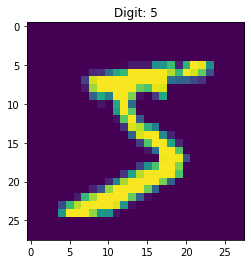

In [ ]:
# Let us load the handwritten image dataset and plot one as an example
%pylab inline
import tensorflow as tf
from tensorflow import keras

((X_train, y_train), 
 (X_test, y_test)) = keras.datasets.mnist.load_data()

print(X_train.shape)
imshow(X_train[0,:,:])
title(f"Digit: {y_train[0]}")

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28))
x = Reshape((28,28,1))(inputs) # because we need "colors" for CNN
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = MaxPool2D(2)(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.25)(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# let use the model we have built:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)             

In [ ]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 166s 88ms/step - loss: 0.2790 - accuracy: 0.9437


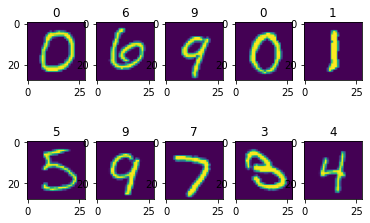

In [ ]:
y_pred = model.predict(X_test[10:20,:,:].astype("float")).argmax(axis=1)

for i in range(10):
    subplot(2,5,i+1)
    imshow(X_test[10+i,:,:])
    title(y_pred[i])

The use of the Functional API and `fit` reduces our example from 65 lines to 25 lines
(including model definition & training). The Keras philosophy is to offer you
productivity-boosting features like
these, while simultaneously empowering you to write everything yourself to gain absolute
control over every little detail. Like we did in the low-level training loop two
paragraphs earlier.

### Tensorboard

One major attractive tool is **Tensorboard** - a dashboard for training ML models in Tensorflow. You install it with pip: `pip install tensorboard`.

To use it, create and add a **callback** to your `model.fit` call.
Instead of 

```
model.fit(X_train, y_train)
```

use

```
tb = keras.callbacks.TensorBoard()
model.fit(X_train, y_train, callbacks=[tb])
```

This writes out logs to the directory `./logs/` that you can view by running the command

```
tensorboard --logdir logs
```

## Example 2: Image Classification from Scratch.

Description: Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

Disclosure: this part is based on <https://keras.io/examples/vision/image_classification_from_scratch/>


## Load the data: the Cats vs Dogs dataset

### Raw data download

First, let's download the 786M ZIP archive of the raw data:

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  91.1M      0  0:00:08  0:00:08 --:--:--  101M


In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


Now we have a `PetImages` folder which contain two subfolders, `Cat` and `Dog`. Each subfolder contains image files for each category.

In [ ]:
!ls PetImages

Cat  Dog


### Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common
occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


## Generate a `Dataset`

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


## Visualize the data

Here are the first 9 images in the training dataset. As you can see, label 1 is "dog"
 and label 0 is "cat".

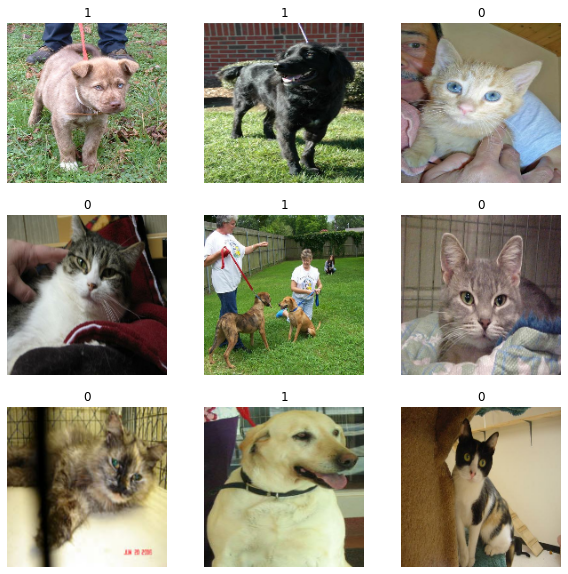

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Using image data augmentation

When you don't have a large image dataset, it's a good practice to artificially
introduce sample diversity by applying random yet realistic transformations to the
training images, such as random horizontal flipping or small random rotations. This
helps expose the model to different aspects of the training data while slowing down
 overfitting.

In [ ]:
from tensorflow import keras
from keras import *
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

Let's visualize what the augmented samples look like, by applying `data_augmentation`
 repeatedly to the first image in the dataset:

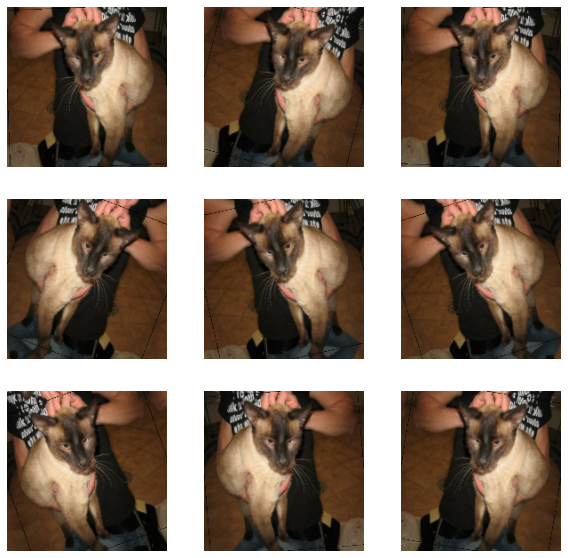

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## Standardizing the data

Our image are already in a standard size (180x180), as they are being yielded as
contiguous `float32` batches by our dataset. However, their RGB channel values are in
 the `[0, 255]` range. This is not ideal for a neural network;
in general you should seek to make your input values small. Here, we will
standardize values to be in the `[0, 1]` by using a `Rescaling` layer at the start of
 our model.

## Two options to preprocess the data

There are two ways you could be using the `data_augmentation` preprocessor:

**Option 1: Make it part of the model**, like this:

```python
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
...  # Rest of the model
```

With this option, your data augmentation will happen *on device*, synchronously
with the rest of the model execution, meaning that it will benefit from GPU
 acceleration.

Note that data augmentation is inactive at test time, so the input samples will only be
 augmented during `fit()`, not when calling `evaluate()` or `predict()`.

If you're training on GPU, this is the better option.

**Option 2: apply it to the dataset**, so as to obtain a dataset that yields batches of
 augmented images, like this:

```python
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))
```

With this option, your data augmentation will happen **on CPU**, asynchronously, and will
 be buffered before going into the model.

If you're training on CPU, this is the better option, since it makes data augmentation
 asynchronous and non-blocking.

In our case, we'll go with the first option.

## Configure the dataset for performance

Let's make sure to use buffered prefetching so we can yield data from disk without
 having I/O becoming blocking:

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Build a model

We'll build a small version of the Xception network. We haven't particularly tried to
optimize the architecture; if you want to do a systematic search for the best model
 configuration, consider using
[Keras Tuner](https://github.com/keras-team/keras-tuner).

Note that:

- We start the model with the `data_augmentation` preprocessor, followed by a
 `Rescaling` layer.
- We include a `Dropout` layer before the final classification layer.

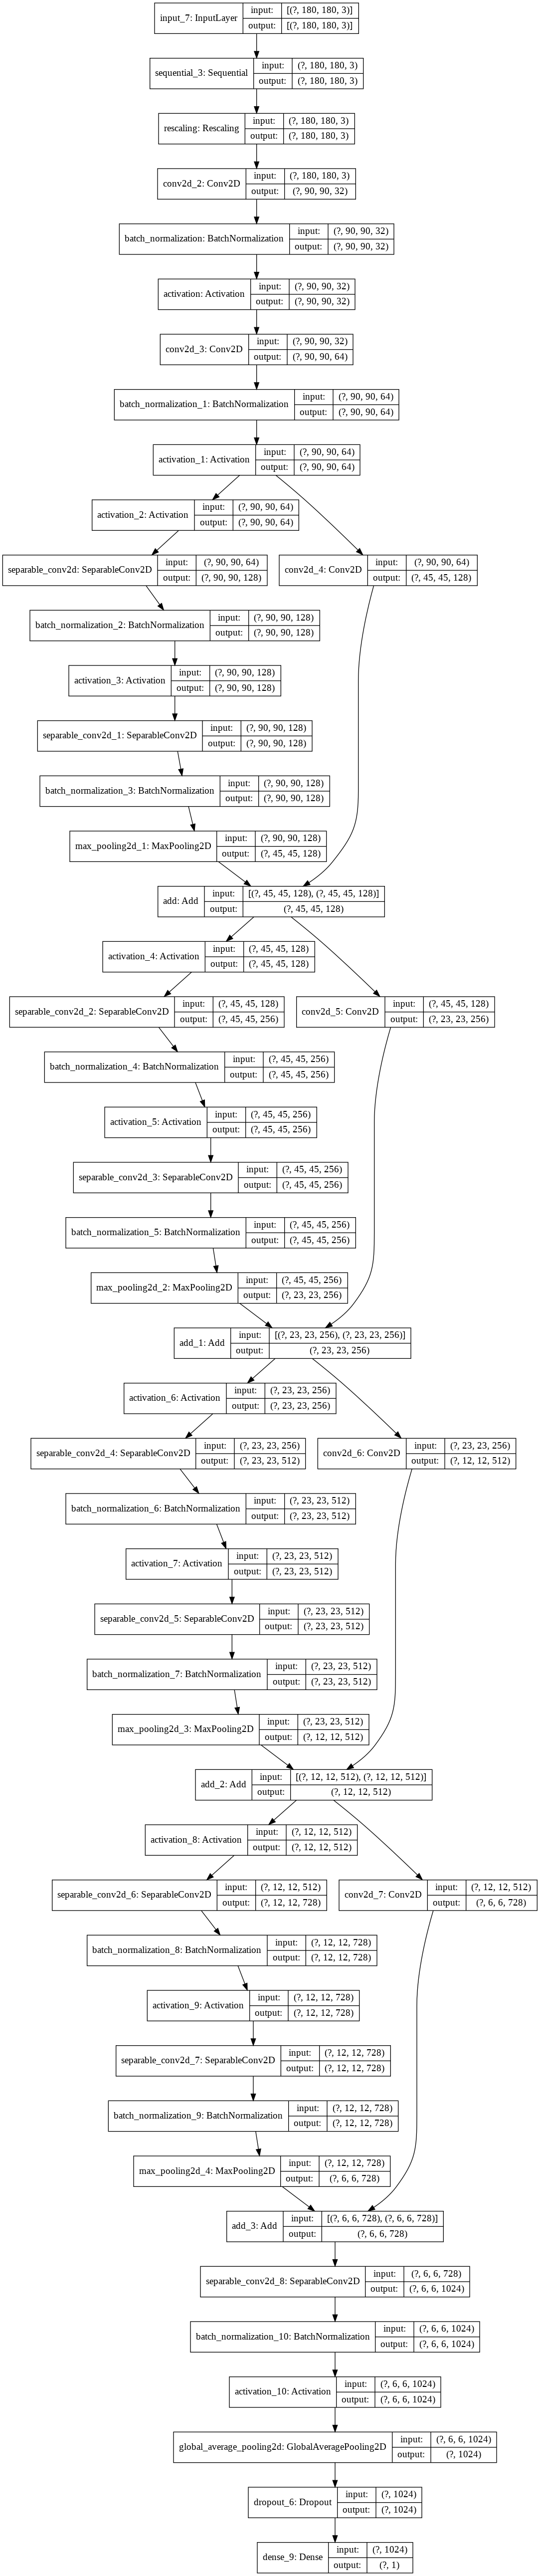

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)


## Train the model

In [ ]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)


Epoch 1/50
586/586 [==============================] - 4949s 8s/step - loss: 0.6355 - accuracy: 0.6487 - val_loss: 0.8469 - val_accuracy: 0.5120
Epoch 2/50
586/586 [==============================] - 4963s 8s/step - loss: 0.4905 - accuracy: 0.7687 - val_loss: 0.5225 - val_accuracy: 0.7625
Epoch 3/50
586/586 [==============================] - 4967s 8s/step - loss: 0.4017 - accuracy: 0.8201 - val_loss: 1.0468 - val_accuracy: 0.5671
Epoch 4/50
586/586 [==============================] - 4970s 8s/step - loss: 0.3305 - accuracy: 0.8551 - val_loss: 0.2834 - val_accuracy: 0.8798
Epoch 5/50
586/586 [==============================] - 4957s 8s/step - loss: 0.2649 - accuracy: 0.8889 - val_loss: 0.2197 - val_accuracy: 0.9058
Epoch 6/50
586/586 [==============================] - 4964s 8s/step - loss: 0.2294 - accuracy: 0.9014 - val_loss: 0.2525 - val_accuracy: 0.9060
Epoch 7/50
467/586 [======================>.......] - ETA: 15:47 - loss: 0.2095 - accuracy: 0.9144

## Run inference on new data

Note that data augmentation and dropout are inactive at inference time.

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

## Example 3: Use Pretrained Model to Predict Population Density Map

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
#from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import os
import glob
import pathlib
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Prepare data
data_dir = pathlib.Path("/content/drive/My Drive/COVID19/GSIMG/")
print(data_dir)

train_image_count=len(list(data_dir.glob('train/*/*.png')))
print(train_image_count)

val_image_count=len(list(data_dir.glob('val/*/*.png')))
print(val_image_count)

CLASS_NAMES=np.array(["high","low","mid"])

/content/drive/My Drive/COVID19/GSIMG
12205
3052


In [ ]:
# set the data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/COVID19/GSIMG/train',
        target_size=(224, 224),
        batch_size=32,
        classes = list(CLASS_NAMES),
        class_mode='categorical',
        seed=123)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/COVID19/GSIMG/val',
        target_size=(224, 224),
        batch_size=32,
        classes = list(CLASS_NAMES),
        class_mode='categorical',
        seed=123)

Found 12205 images belonging to 3 classes.
Found 3052 images belonging to 3 classes.


In [ ]:
# Set some parameters

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)
print(STEPS_PER_EPOCH)
VAL_STEPS = np.ceil(val_image_count/BATCH_SIZE)


# USE Pretrained VGG16 for another classification task
# fine tune the VGG model
def pretrained_model(img_shape, num_classes,layer_type):
    # remove the last three fully connected layers
    model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
    # Freeze the layers except the last 4 layers
    for layer in model_vgg16_conv.layers:
        layer.trainable = False
    #model_vgg16_conv.summary()
    #Create your own input format
    keras_input = Input(shape=img_shape, name = 'image_input')
    #Use the generated model 
    output_vgg16_conv = model_vgg16_conv(keras_input)
    #Add the fully-connected layers 
    x = Flatten(name='flatten')(output_vgg16_conv)
    x = Dense(4096, activation=layer_type, name='fc1')(x)
    x = Dropout(.5)(x)
    x = Dense(4096, activation=layer_type, name='fc2')(x)
    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    #Create your own model 
    pretrained_model = Model(inputs=keras_input, outputs=x)
     # Freeze the layers except the last 4 layers
    for layer in  pretrained_model.layers[:-5]:
        layer.trainable = False
    pretrained_model.compile(loss='categorical_crossentropy', 
                             optimizer='adam', 
                             metrics=['accuracy'])
    return pretrained_model


382.0


**You can check here for more pretrained models <https://keras.io/api/applications/>. Those models could be used for different purposes such as text and image classification etc.**

Here is the VGG architecture:

<img src="https://miro.medium.com/max/470/1*3-TqqkRQ4rWLOMX-gvkYwA.png" width="500"></img>

In [ ]:

# training the model

model = pretrained_model((224,224,3), len(set(CLASS_NAMES)),"relu")

model.summary()

for layer in model.layers:
    print(layer, layer.trainable)
    
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/COVID19/output/weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                               verbose=1, 
                               monitor='val_accuracy',
                               #save_weights_only=True, 
                               mode='max', 
                               save_freq= int(10 * STEPS_PER_EPOCH)
                               save_best_only=True)

history = model.fit
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        validation_data=validation_generator,
        validation_steps=VAL_STEPS,
        epochs=20,
        callbacks=[checkpointer])
        
model.save("/content/drive/My Drive/COVID19/output/google_fb_model.h5")

58892288/58889256 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_______________________________________________________

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


382/382 [==============================] - ETA: 0s - loss: 1.4098 - accuracy: 0.6753 
Epoch 00001: val_accuracy improved from -inf to 0.67988, saving model to /content/drive/My Drive/COVID19/output/weights.01-0.63.hdf5
382/382 [==============================] - 11453s 30s/step - loss: 1.4098 - accuracy: 0.6753 - val_loss: 0.6340 - val_accuracy: 0.6799
Epoch 2/20
382/382 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.6870 
Epoch 00002: val_accuracy improved from 0.67988 to 0.68283, saving model to /content/drive/My Drive/COVID19/output/weights.02-0.63.hdf5
382/382 [==============================] - 8154s 21s/step - loss: 0.6819 - accuracy: 0.6870 - val_loss: 0.6320 - val_accuracy: 0.6828
Epoch 3/20
382/382 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.6805 
Epoch 00003: val_accuracy improved from 0.68283 to 0.75164, saving model to /content/drive/My Drive/COVID19/output/weights.03-0.57.hdf5
382/382 [==============================] - 814

I hope you enjoyed this quick introduction. Let us know what you build with Keras!